In [10]:
import pandas as pd
import os
from pathlib import Path
import glob

# Auto-discovery of Phase 4.5 steering coefficient data
datasets_dir = "../data/phase4_8/"
pattern = os.path.join(datasets_dir, "*.parquet")
matching_files = glob.glob(pattern)

if matching_files:
    # Sort by filename for consistent ordering
    matching_files.sort()
    print(f"🔍 Found {len(matching_files)} steered files")
    for file in matching_files:
        print(f"  📁 {Path(file).name}")
else:
    raise FileNotFoundError(f"No steered parquet files found in {datasets_dir}")

🔍 Found 2 steered files
  📁 selected_correct_problems.parquet
  📁 selected_incorrect_problems.parquet


In [11]:
# Load and display first 10 records for each steering coefficient dataset

# Set pandas display options to show full content
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows (for head(10))
pd.set_option('display.max_colwidth', None) # Show full textin each cell
pd.set_option('display.width', None)        # Don't wrap to terminal width
for file_path in matching_files:
    file_name = Path(file_path).name
    print(f"\n{'='*50}")
    print(f"Dataset: {file_name}")
    print(f"{'='*50}")
    
    df = pd.read_parquet(file_path)
    print(f"Records: {len(df)}")
    print(f"Columns: {list(df.columns)}")
    print("\nFirst 10 records:")
    display(df.head(10))


Dataset: selected_correct_problems.parquet
Records: 2
Columns: ['task_id', 'temperature', 'prompt', 'generated_code', 'test_passed', 'error_message', 'generation_time', 'cyclomatic_complexity', 'generation_idx', 'test_list', 'steered_generated_code', 'steered_passed', 'flipped']

First 10 records:


,task_id,temperature,prompt,generated_code,test_passed,error_message,generation_time,cyclomatic_complexity,generation_idx,test_list,steered_generated_code,steered_passed,flipped
0,8,0.0,"Write a Python function to solve the following problem.\n\nProblem:\nWrite a function to find squares of individual elements in a list using lambda function.\n\nYour function must pass all of these test cases:\nassert assert square_nums([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])==[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]\nassert assert square_nums([10,20,30])==([100,400,900])\nassert assert square_nums([12,15])==([144,225])\n\nWrite only the function definition. Do not include test code or explanations.\n\n# Your code here:",def square_nums(nums):\n return [x**2 for x in nums],True,None,4.478519,1,0,"[""assert square_nums([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])==[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]"", ""assert square_nums([10,20,30])==([100,400,900])"", ""assert square_nums([12,15])==([144,225])""]",def square_nums(nums):\n return [x**2 for x in nums]},False,True
1,22,0.0,"Write a Python function to solve the following problem.\n\nProblem:\nWrite a function to find the first duplicate element in a given array of integers.\n\nYour function must pass all of these test cases:\nassert assert find_first_duplicate(([1, 2, 3, 4, 4, 5]))==4\nassert assert find_first_duplicate([1, 2, 3, 4])==-1\nassert assert find_first_duplicate([1, 1, 2, 3, 3, 2, 2])==1\n\nWrite only the function definition. Do not include test code or explanations.\n\n# Your code here:","def find_first_duplicate(arr):\n for i in range(len(arr)):\n for j in range(i+1, len(arr)):\n if arr[i] == arr[j]:\n return arr[i]\n return -1",True,None,10.557614,3,0,"[""assert find_first_duplicate(([1, 2, 3, 4, 4, 5]))==4"", ""assert find_first_duplicate([1, 2, 3, 4])==-1"", ""assert find_first_duplicate([1, 1, 2, 3, 3, 2, 2])==1""]",def find_first_duplicate(arr):\n return arr[0] if len(arr) == 1 else -1},False,True



Dataset: selected_incorrect_problems.parquet
Records: 8
Columns: ['task_id', 'temperature', 'prompt', 'generated_code', 'test_passed', 'error_message', 'generation_time', 'cyclomatic_complexity', 'generation_idx', 'test_list', 'steered_generated_code', 'steered_passed', 'flipped']

First 10 records:


task_id  temperature  \
0        1          0.0   
1        5          0.0   
2       10          0.0   
3       14          0.0   
4       17          0.0   
5       18          0.0   
6       20          0.0   
7       21          0.0   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 prompt  \
0  Write a Python function to solve the following problem.\n\nProblem:\nWrite a function to find the minimum cost path to reach (m, n) from (0, 0) for the given cost matrix cost[][] and a position (m, n) in cost[][].\n\nYour function must pass all of these test cases:\nassert assert min_cost([[1, 2, 3], [4, 8, 2], [1, 5, 3]], 2, 2) == 8\nassert assert min_cost([[2, 3, 4], [5, 9, 3], [2, 6, 4]], 2, 2) == 12\nassert assert min_cost([[3, 4, 5], [6, 10, 4], [3, 7, 5]], 2, 2) == 16\n\nWrite only the function definition. Do not include test code or explanations.\n\n# Your code here:   
1                                                                                                                                                      Write a Python function to solve the following problem.\n\nProblem:\nWrite a function to find the number of ways to fill it with 2 x 1 dominoes for the given 3 x n board.\n\nYour function must pass all of these test cases:\nassert assert count_ways(2) == 3\nassert assert count_ways(8) == 153\nassert assert count_ways(12) == 2131\n\nWrite only the function definition. Do not include test code or explanations.\n\n# Your code here:   
2                                   Write a Python function to solve the following problem.\n\nProblem:\nWrite a function to get the n smallest items from a dataset.\n\nYour function must pass all of these test cases:\nassert assert small_nnum([10, 20, 50, 70, 90, 20, 50, 40, 60, 80, 100],2)==[10,20]\nassert assert small_nnum([10, 20, 50, 70, 90, 20, 50, 40, 60, 80, 100],5)==[10,20,20,40,50]\nassert assert small_nnum([10, 20, 50, 70, 90, 20, 50, 40, 60, 80, 100],3)==[10,20,20]\n\nWrite only the function definition. Do not include test code or explanations.\n\n# Your code here:   
3                                                                                                                                                                              Write a Python function to solve the following problem.\n\nProblem:\nWrite a python function to find the volume of a triangular prism.\n\nYour function must pass all of these test cases:\nassert assert find_Volume(10,8,6) == 240\nassert assert find_Volume(3,2,2) == 6\nassert assert find_Volume(1,2,1) == 1\n\nWrite only the function definition. Do not include test code or explanations.\n\n# Your code here:   
4                                                                                                                                                                                              Write a Python function to solve the following problem.\n\nProblem:\nWrite a function to find the perimeter of a square.\n\nYour function must pass all of these test cases:\nassert assert square_perimeter(10)==40\nassert assert square_perimeter(5)==20\nassert assert square_perimeter(4)==16\n\nWrite only the function definition. Do not include test code or explanations.\n\n# Your code here:   
5                                                Write a Python function to solve the following problem.\n\nProblem:\nWrite a function to remove characters from the first string which are present in the second string.\n\nYour function mu

In [12]:
# Load the steering effect analysis results
import json
from pathlib import Path

# Load the analysis metrics
analysis_file = Path("../data/phase4_8/steering_effect_analysis.json")
if analysis_file.exists():
    with open(analysis_file, 'r') as f:
        metrics = json.load(f)
    print("✅ Loaded steering effect analysis metrics")
    print(f"Correction Rate: {metrics['correction_rate']:.1f}%")
    print(f"Corruption Rate: {metrics['corruption_rate']:.1f}%")
else:
    print("❌ steering_effect_analysis.json not found!")

✅ Loaded steering effect analysis metrics
Correction Rate: 25.0%
Corruption Rate: 100.0%



📊 Creating steering effect visualization...


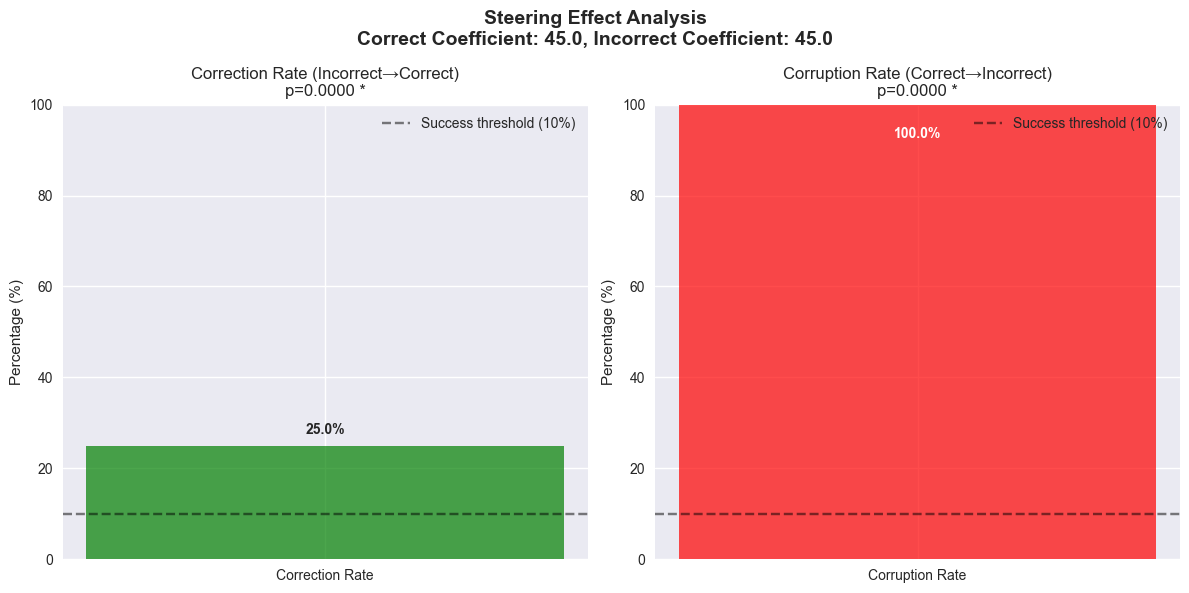

In [17]:
# Create the steering effect visualization
import matplotlib.pyplot as plt

def create_steering_visualization(metrics, save_path=None, show_plot=True):
    """
    Create visualization plots for steering effects.
    
    Args:
        metrics: Dict containing analysis results
        save_path: Optional path to save the plot
        show_plot: Whether to display the plot (default True)
    """
    plt.style.use('seaborn-v0_8')
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # Plot correction rate
    correction_rate = metrics['statistical_tests']['correction']['rate']
    correction_pvalue = metrics['statistical_tests']['correction']['pvalue']
    correction_sig = metrics['statistical_tests']['correction']['significant']
    
    ax1.bar(['Correction Rate'], [correction_rate], color='green' if correction_sig else 'gray', alpha=0.7)
    ax1.set_ylabel('Percentage (%)')
    ax1.set_title(f'Correction Rate (Incorrect→Correct)\np={correction_pvalue:.4f} {"*" if correction_sig else "n.s."}')
    ax1.set_ylim(0, 100)
    
    # Dynamic text positioning to avoid overlap
    if correction_rate < 90:
        ax1.text(0, correction_rate + 2, f'{correction_rate:.1f}%', 
                 ha='center', va='bottom', fontweight='bold')
    else:
        ax1.text(0, correction_rate - 5, f'{correction_rate:.1f}%', 
                 ha='center', va='top', fontweight='bold', color='white')
    
    # Plot corruption rate
    corruption_rate = metrics['statistical_tests']['corruption']['rate']
    corruption_pvalue = metrics['statistical_tests']['corruption']['pvalue']
    corruption_sig = metrics['statistical_tests']['corruption']['significant']
    
    ax2.bar(['Corruption Rate'], [corruption_rate], color='red' if corruption_sig else 'gray', alpha=0.7)
    ax2.set_ylabel('Percentage (%)')
    ax2.set_title(f'Corruption Rate (Correct→Incorrect)\np={corruption_pvalue:.4f} {"*" if corruption_sig else "n.s."}')
    ax2.set_ylim(0, 100)
    
    # Dynamic text positioning to avoid overlap
    if corruption_rate < 90:
        ax2.text(0, corruption_rate + 2, f'{corruption_rate:.1f}%', 
                 ha='center', va='bottom', fontweight='bold')
    else:
        ax2.text(0, corruption_rate - 5, f'{corruption_rate:.1f}%', 
                 ha='center', va='top', fontweight='bold', color='white')
    
    # Add main title
    fig.suptitle(f'Steering Effect Analysis\nCorrect Coefficient: {metrics["coefficients"]["correct"]}, '
                f'Incorrect Coefficient: {metrics["coefficients"]["incorrect"]}', 
                fontsize=14, fontweight='bold')
    
    # Add success criteria line at 10%
    for ax in [ax1, ax2]:
        ax.axhline(y=10, color='black', linestyle='--', alpha=0.5, label='Success threshold (10%)')
        ax.legend()
    
    plt.tight_layout()
    
    # Save plot if path provided
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"💾 Saved visualization to {save_path}")
    
    # Show plot
    if show_plot:
        plt.show()
    else:
        plt.close()

# Create the visualization
print("\n📊 Creating steering effect visualization...")
create_steering_visualization(metrics)

# Optionally save an updated version
# create_steering_visualization(metrics, save_path="../data/phase4_8/steering_effect_analysis_v2.png")

## Summary Statistics

The cells above provide:
1. **Parquet file analysis** - View the steered results data
2. **Metrics loading** - Load the analysis JSON with rates and p-values  
3. **Standard visualization** - Recreate the exact plot from Phase 4.8
4. **Custom visualization** - Example of how to modify the plot style

You can now:
- Modify the visualization function and re-run to test different designs
- Save updated plots with different filenames
- Experiment with colors, fonts, layout without rerunning Phase 4.8
- All plots will maintain the fixed 0-100% y-axis scale for proper comparison